# Lesson 04: Basic topographic features

*This lesson made by Simon M Mudd and last updated 22/11/2021*

In this lesson we are going to do some basic analysis of topography. There are a lot of different software tools for doing this, for example:
* [Whitebox](https://www.whiteboxgeo.com/download-whiteboxtools/)
* [TopoToolbox](https://topotoolbox.wordpress.com/)
* [SAGA](http://www.saga-gis.org/en/index.html)

However, for these example we will use [LSDTopoTools](https://github.com/LSDtopotools) because the person writing this lesson is also the lead developer of that software. The expectation for this lesson is that you are on a GeoSciences Notable notebook, where LSDTopoTools is already installed. If you aren't on that system you can also [install it on a Colab notebook](https://github.com/LSDtopotools/lsdtt_notebooks/blob/master/lsdtopotools_on_colab.ipynb).

The objective of this practical is to give you a taster of what kinds of things you might do with topographic data. 

## First import some stuff we need

First we make sure lsdviztools version is updated (it needs to be > 0.4.7):

In [4]:
!pip install lsdviztools --upgrade

Now we import a bunch of stuff

In [5]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw
import pandas as pd
import geopandas as gpd
import cartopy as cp
import cartopy.crs as ccrs
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

## Data preprocessing

For various historical reasons, **LSDTopoTools** does not read *GeoTiff* format, so we need to convert any rasters to [ENVI bil](https://www.l3harrisgeospatial.com/docs/enviimagefiles.html#:~:text=The%20ENVI%20image%20format%20is,an%20accompanying%20ASCII%20header%20file.&text=Band%2Dinterleaved%2Dby%2Dline,to%20the%20number%20of%20bands.) format. **This is not the same as ESRI bil! MAKE SURE YOU USE ENVI BIL!!**

You could convert any file to `ENVI bil` format using `gdalwarp` and then including the parametr `-of ENVI` (`of` stands for output format) but `lsdviztools` has some built in functions for doing that for you in python. 

We are going to use the ALOS W3D dataset (from the last lesson) for this lesson, and here is the conversion syntax:

In [6]:
DataDirectory = "./"
RasterFile = "rio_aguas_AW3D30.tif"
gio.convert4lsdtt(DataDirectory, RasterFile,minimum_elevation=0.01,resolution=30)

The projections is:
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
And some extra projection information strings:
None
WGS 84
The centre of the raster is at:
(-2.196805555530607, 36.99597222221553)
dem_data.width is: 1713
The latitude and longitude is
36.99597222221553 -2.196805555530607
res tuple is:
(30, 30)
The destination CRS is: EPSG:32630
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 1419, 'height': 913, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(30.0, 0.0, 560466.1250051225,
       0.0, -30.0, 4121446.5254671737)}
Removing pixels with an elevation less than 0.01


'rio_aguas_AW3D30_UTM.bil'

You can serach for specific files using the `!ls` command, so we can look for the file that has been created. 

There is a `.tif` file from the last lesson, but the two files with extensions `.bil` and `.hdr` are from the conversion. ENVI bil files have all the data in the `.bil` file and all the georeferencing in the `.hdr` file. The `.hdr` file is an ascii file so you can easily open these files in a text editor and see all the important metadata. 

In [7]:
!ls rio_aguas_AW3D30_UTM*

rio_aguas_AW3D30_UTM.bil	  rio_aguas_AW3D30_UTM.hdr
rio_aguas_AW3D30_UTM.bil.aux.xml  rio_aguas_AW3D30_UTM.tif


# Now lets do some basic topographic analysis

Now will extract some topogaphic metrics using `lsdtopotools`. 

The `lsdtt_parameters` are the various parameters that you can use to run an analysis. We will discuss these later. For now, we will just follow this recipe. 

In [8]:
lsdtt_parameters = {"write_hillshade" : "true",  
                    "surface_fitting_radius" : "60",
                    "print_slope" : "true"}
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "rio_aguas_AW3D30_UTM",
                                 write_prefix= "rio_aguas_AW3D30_UTM",
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: rio_aguas_AW3D30_UTM
The write prefix is: rio_aguas_AW3D30_UTM
The parameter dictionary is:
{'write_hillshade': 'true', 'surface_fitting_radius': '60', 'print_slope': 'true'}


In [9]:
lsdtt_drive.run_lsdtt_command_line_tool()

Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.
|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
|| https://www.doi.org/10.5281/zenodo.2560223          ||
|| If you use the roughness routine please cite:       ||
|| https://www.doi.org/10.5194/esurf-3-483-2015        ||
|| Documentation can be found at:                      ||
|| https://lsdtopotools.github.io/LSDTT_documentation/ ||
|| You have called an LSDTopoTools program.            ||
|| Prepare to explore topographic data!                ||
|| You can read the documentation at:                  ||
I have one argument. I don't know if this is a directory path
or a driver filename. I am going 

# Plot some data

We are now going to do some simple plots using a mapping package that we put together. There are more general ways to visualise data, but this makes pretty pictures quickly.  

In [17]:
%matplotlib inline
Base_file = "rio_aguas_AW3D30_UTM"
DataDirectory = "./"
this_img = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth", save_fig=True, size_format="geomorphology", dpi=600)

Your colourbar will be located: right
xsize: 1419 and y size: 913
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
minimum values are x: 560466.0 and y: 4094056.0
I made the ticks.
x labels are: 
['568', '576', '584', '592', '600']
x locations are:
[568000.0, 576000.0, 584000.0, 592000.0, 600000.0]
y labels are: 
['4102', '4110', '4118']
y locations are:
[4102000.0, 4110000.0, 4118000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1419 and y size: 913
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
I am going to use the normalisation None
I am using the full range of values in the raster.
The number of axes are: 2
The aspect ratio is: 1.5542168674698795
I need to adjust the spacing of the colourbar.
You have a colourbar on the left or right, I need to check the number of characters in the labels.
['', '']
The longest colourbar lab

/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:1227: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im,cmap=BaseRaster._colourmap,spacing='uniform', orientation=self.colourbar_orientation,cax=ax_list[-1],drawedges=False)


I'm returning:
./rio_aguas_AW3D30_UTM_hillshade.png


<Figure size 432x288 with 0 Axes>

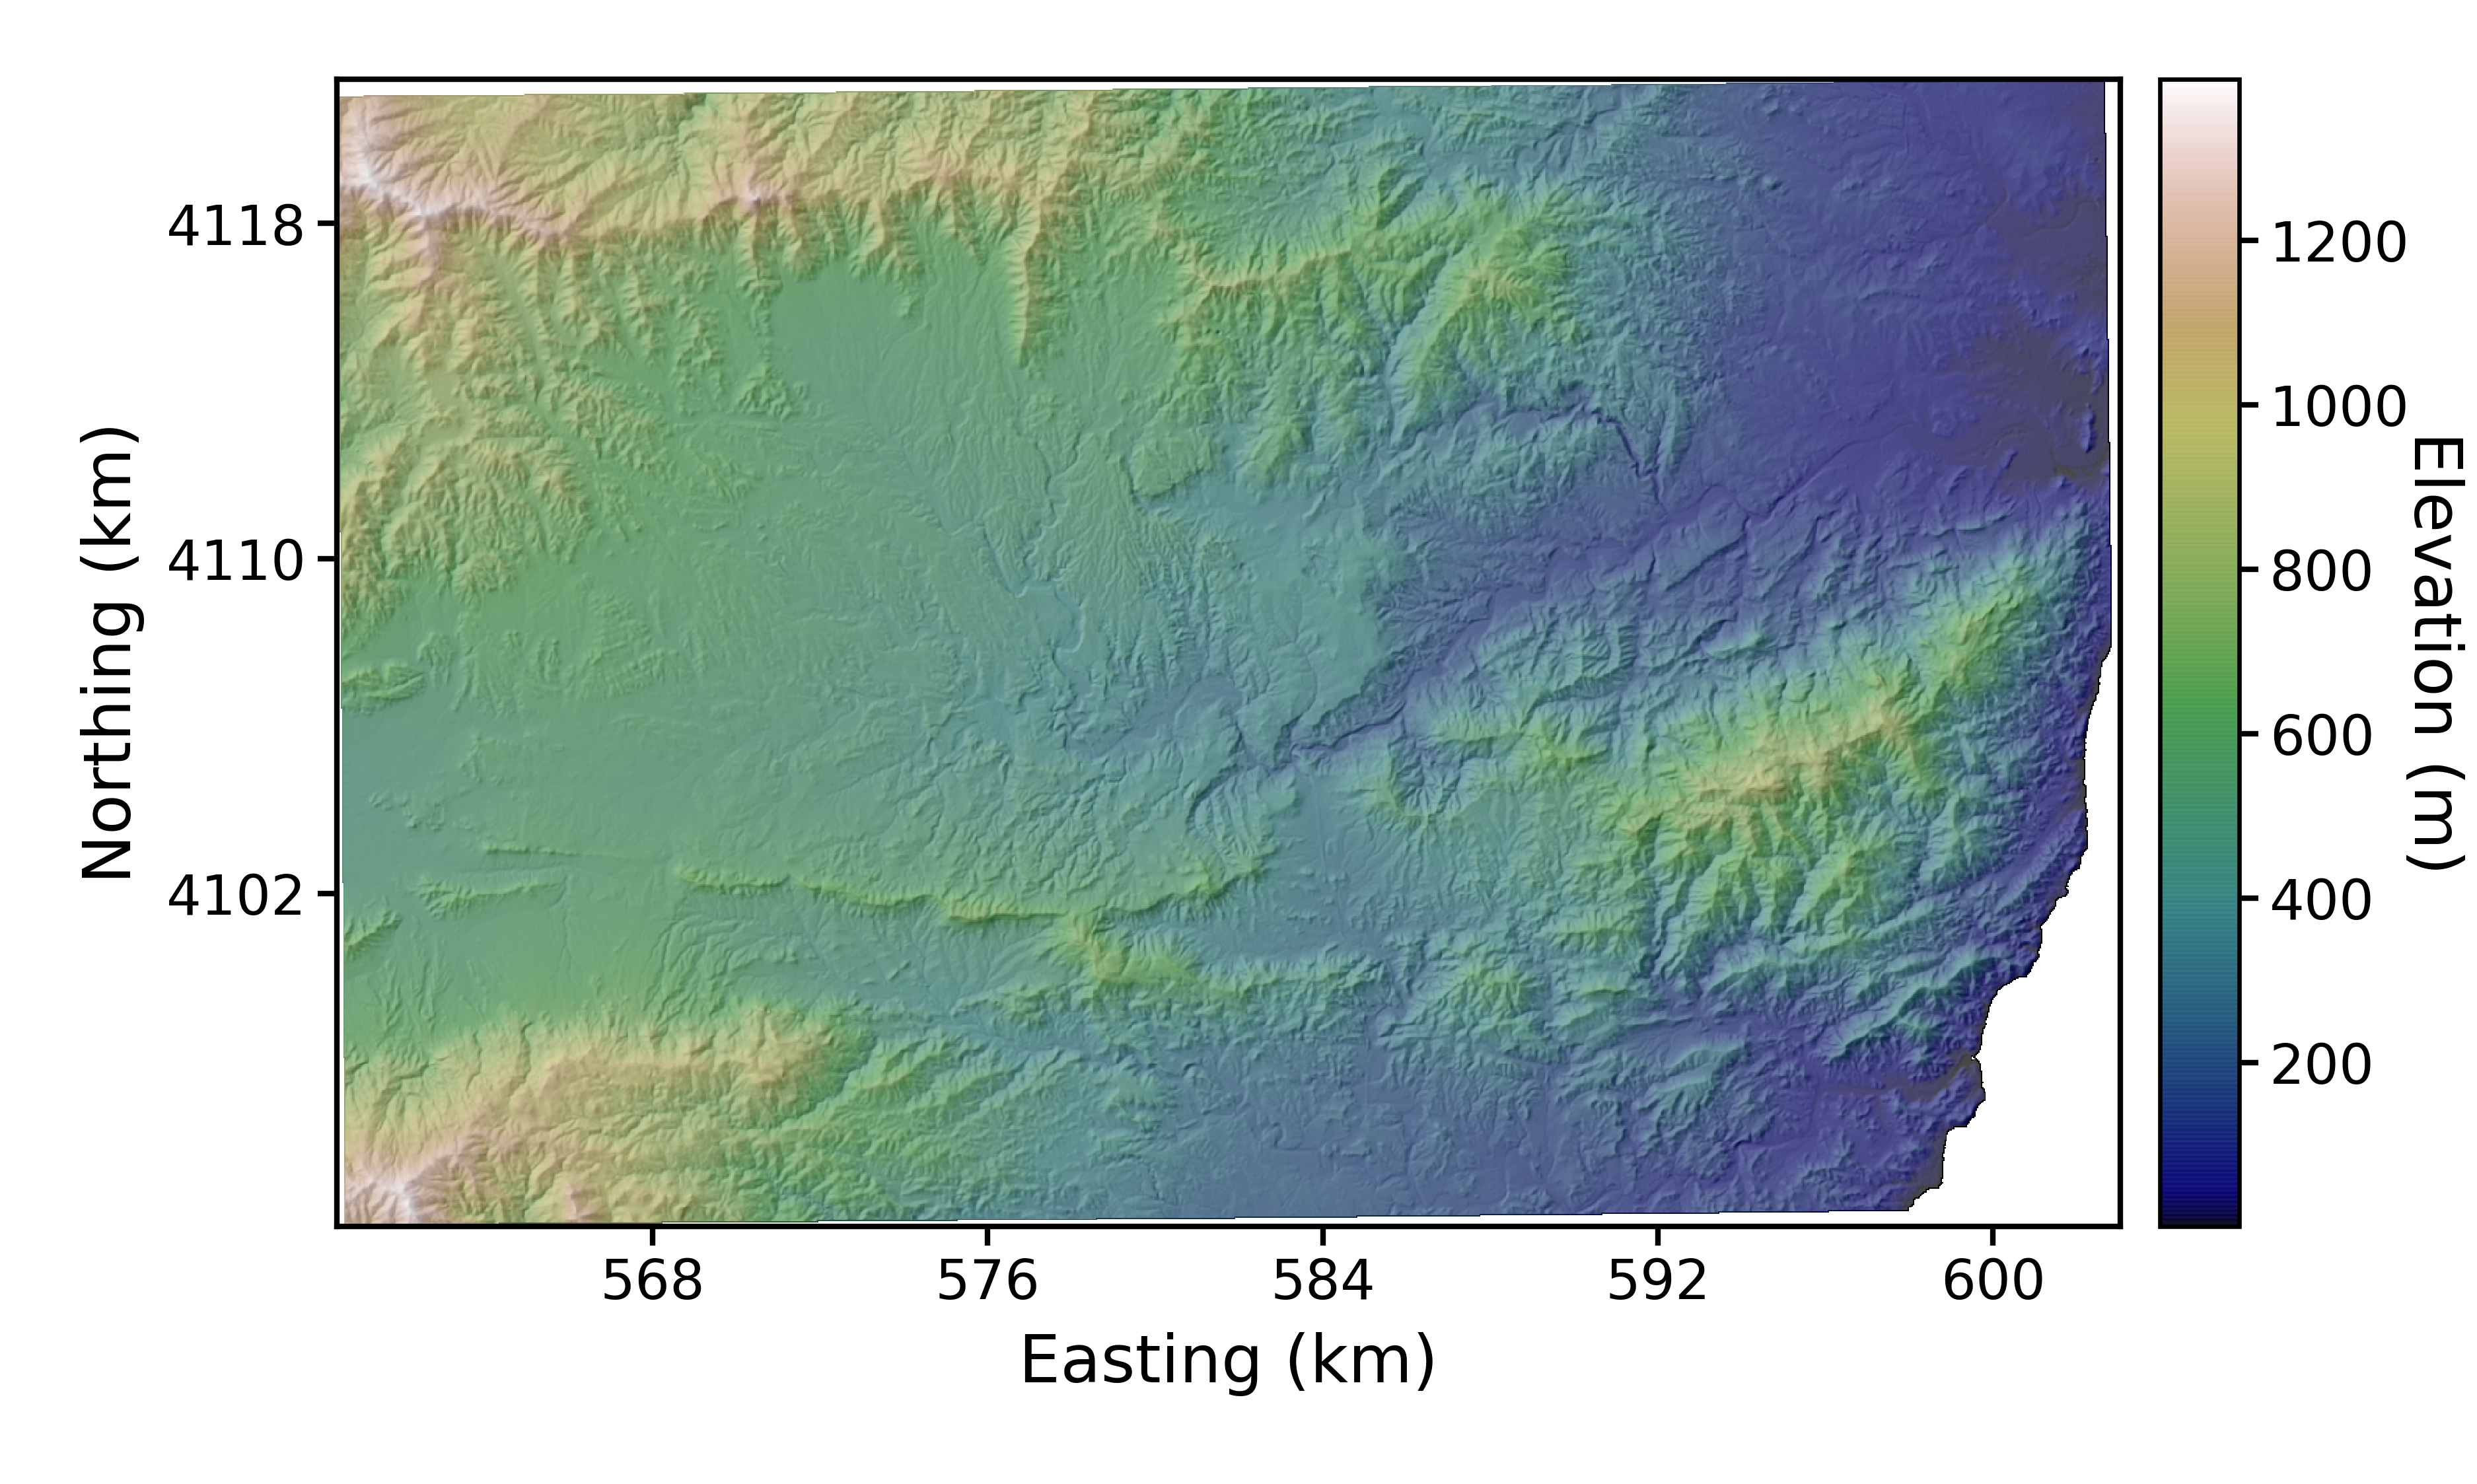

In [18]:
from IPython.display import Image
Image('rio_aguas_AW3D30_UTM_hillshade.png')

In [19]:
Base_file = "rio_aguas_AW3D30_UTM"
Drape_prefix = "rio_aguas_AW3D30_UTM_SLOPE"
DataDirectory = "./"
img_name2 = lsdmw.SimpleDrape(DataDirectory,Base_file, Drape_prefix, 
                              cmap = "bwr", cbar_loc = "right", 
                              cbar_label = "Gradient (m/m)",
                              save_fig=True, size_format="geomorphology",
                              colour_min_max = [0,1.25])

Your colourbar will be located: right
xsize: 1419 and y size: 913
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
minimum values are x: 560466.0 and y: 4094056.0
I made the ticks.
x labels are: 
['568', '576', '584', '592', '600']
x locations are:
[568000.0, 576000.0, 584000.0, 592000.0, 600000.0]
y labels are: 
['4102', '4110', '4118']
y locations are:
[4102000.0, 4110000.0, 4118000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 1419 and y size: 913
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
I am going to use the normalisation None
I am using the full range of values in the raster.
custom min and max are:
0
1.25
I am setting customisable colourbar minimum and maximum values: 0,1.25
The number of axes are: 2
The aspect ratio is: 1.5542168674698795
I need to adjust the spacing of the colourbar.
You have a colourbar on the lef

<Figure size 432x288 with 0 Axes>

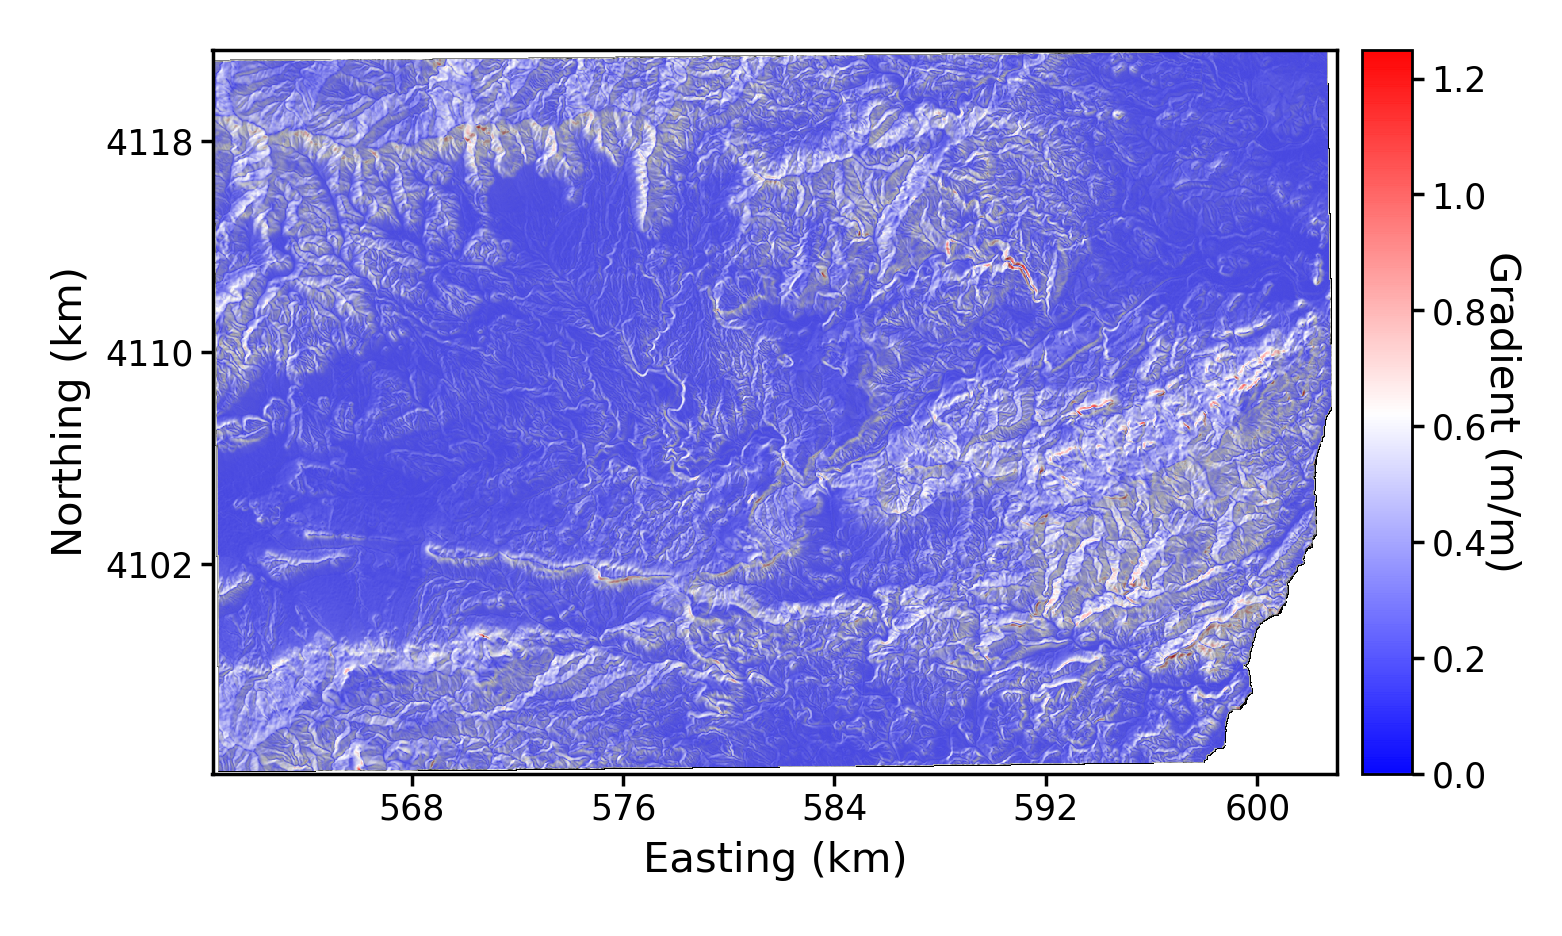

In [20]:
from IPython.display import Image
Image('rio_aguas_AW3D30_UTM_drape.png')

# Get some channel profiles

Okay, we will now run a different analysis. We will get some channel profiles. 

In [13]:
lsdtt_parameters = {"print_basin_raster" : "true",
                    "print_chi_data_maps" : "true"}
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "rio_aguas_AW3D30_UTM",
                                 write_prefix= "rio_aguas_AW3D30_UTM",
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: rio_aguas_AW3D30_UTM
The write prefix is: rio_aguas_AW3D30_UTM
The parameter dictionary is:
{'print_basin_raster': 'true', 'print_chi_data_maps': 'true'}


In [14]:
lsdtt_drive.run_lsdtt_command_line_tool()

Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.
|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
|| https://www.doi.org/10.5281/zenodo.2560223          ||
|| If you use the roughness routine please cite:       ||
|| https://www.doi.org/10.5194/esurf-3-483-2015        ||
|| Documentation can be found at:                      ||
|| https://lsdtopotools.github.io/LSDTT_documentation/ ||
|| You have called an LSDTopoTools program.            ||
|| Prepare to explore topographic data!                ||
|| You can read the documentation at:                  ||
I have one argument. I don't know if this is a directory path
or a driver filename. I am going 

The filename is ./rio_aguas_AW3D30_UTM_AllBasins.bil
Finished with exporting basins!
I am going to print some simple chi data maps for visualisation.
These data maps are also useful for visualising channel networks and making channel profiles.
Finished with basins
Done with channel extraction
I'm all finished! Have a nice day.


We can look to see what files we have using the following command. the `!` tells this notebook to run a command on the underlying linux operating system, and `ls` in linux is a command to list files. 

In [ ]:
!ls

The file with the channels is the one with `chi_data_map` in the filename. We are going to load this into a `pandas` dataframe. You can think of `pandas` as a kind of excel for python. It does data handling of spreadsheet-like information (and loads more.)

In [ ]:
df = pd.read_csv("rio_aguas_SRTMGL1_UTM_chi_data_map.csv")
df.head()

In [15]:
%matplotlib inline
fname_prefix = "rio_aguas_SRTMGL1_UTM"
ChannelFileName = "rio_aguas_SRTMGL1_UTM_chi_data_map.csv"
DataDirectory = "./"
lsdmw.PrintChiChannelsAndBasins(DataDirectory,fname_prefix, ChannelFileName, 
                                add_basin_labels = True, cmap = "jet", cbar_loc = "right", 
                                size_format = "ESURF", fig_format = "png", 
                                dpi = 400,plotting_column = "elevation")

Basin keys are: 
[0, 1]
I'm going to make the basin plots. Your topographic data must be in ENVI bil format or I'll break!!
rio_aguas_SRTMGL1_UTM_AllBasins.bil
rio_aguas_SRTMGL1_UTM_AllBasins.bil
Let me grab the coordinate reference system.
EPSG:32630
Whoops. Found a repeated ID. Getting rid of the smaller one.
Found a repeated ID. Keeping the one with area of 523359000.0
I need to convert the crs to wkt format so it is resistant to stupid proj errors.
ID is: 129.0
ID is: 478.0
The object file prefix is: rio_aguas_SRTMGL1_UTM_chi_data_map
Loading your file from csv
done
I am selecting your data for specific basin_key
I am showing the basins without text labels.
Your colourbar will be located: None
xsize: 1419 and y size: 913
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32630
EPSG:32630
The EPSGString is: EPSG:32630
minimum values are x: 560453.0 and y: 4094040.0
I made the ticks.
x labels are: 
['568', '576', '584', '592', '600']
x locations are:
[568000.0, 576000.0, 584000.0, 592000.

/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:453: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.tick_x_labels)
/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:454: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.tick_y_labels)


Let me grab the coordinate reference system.
EPSG:32630
Whoops. Found a repeated ID. Getting rid of the smaller one.
Found a repeated ID. Keeping the one with area of 523359000.0
I need to convert the crs to wkt format so it is resistant to stupid proj errors.
ID is: 129.0
ID is: 478.0
The number of basins are: 2
The number of points are: 2
Plotting the polygons, colouring by basin...
129.0 129
478.0 478
I am going to plot some points for you. The EPSG string is:EPSG:32630
pointtools GetUTMEastingNorthing, getting the epsg string: EPSG:32630
WARNING you must have a recent (>=6) version of proj and pyproj (>=2.4) for this to work 
EPSG:32630
I got the easting and northing
I got the data column you wanted
I have taken the log your colour data, the minimum is 0.6992305028834092 and the maximum is 2.975431808509263
I also got the data for scaling, which is in column drainage_area
The size of the array is: 
(17072,)
I am going to convert data to log for point scaling.
I logged (is it a verb

/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:1371: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(sc,cmap=cmap, orientation=self.colourbar_orientation,cax=ax_list[-1])


<Figure size 432x288 with 0 Axes>

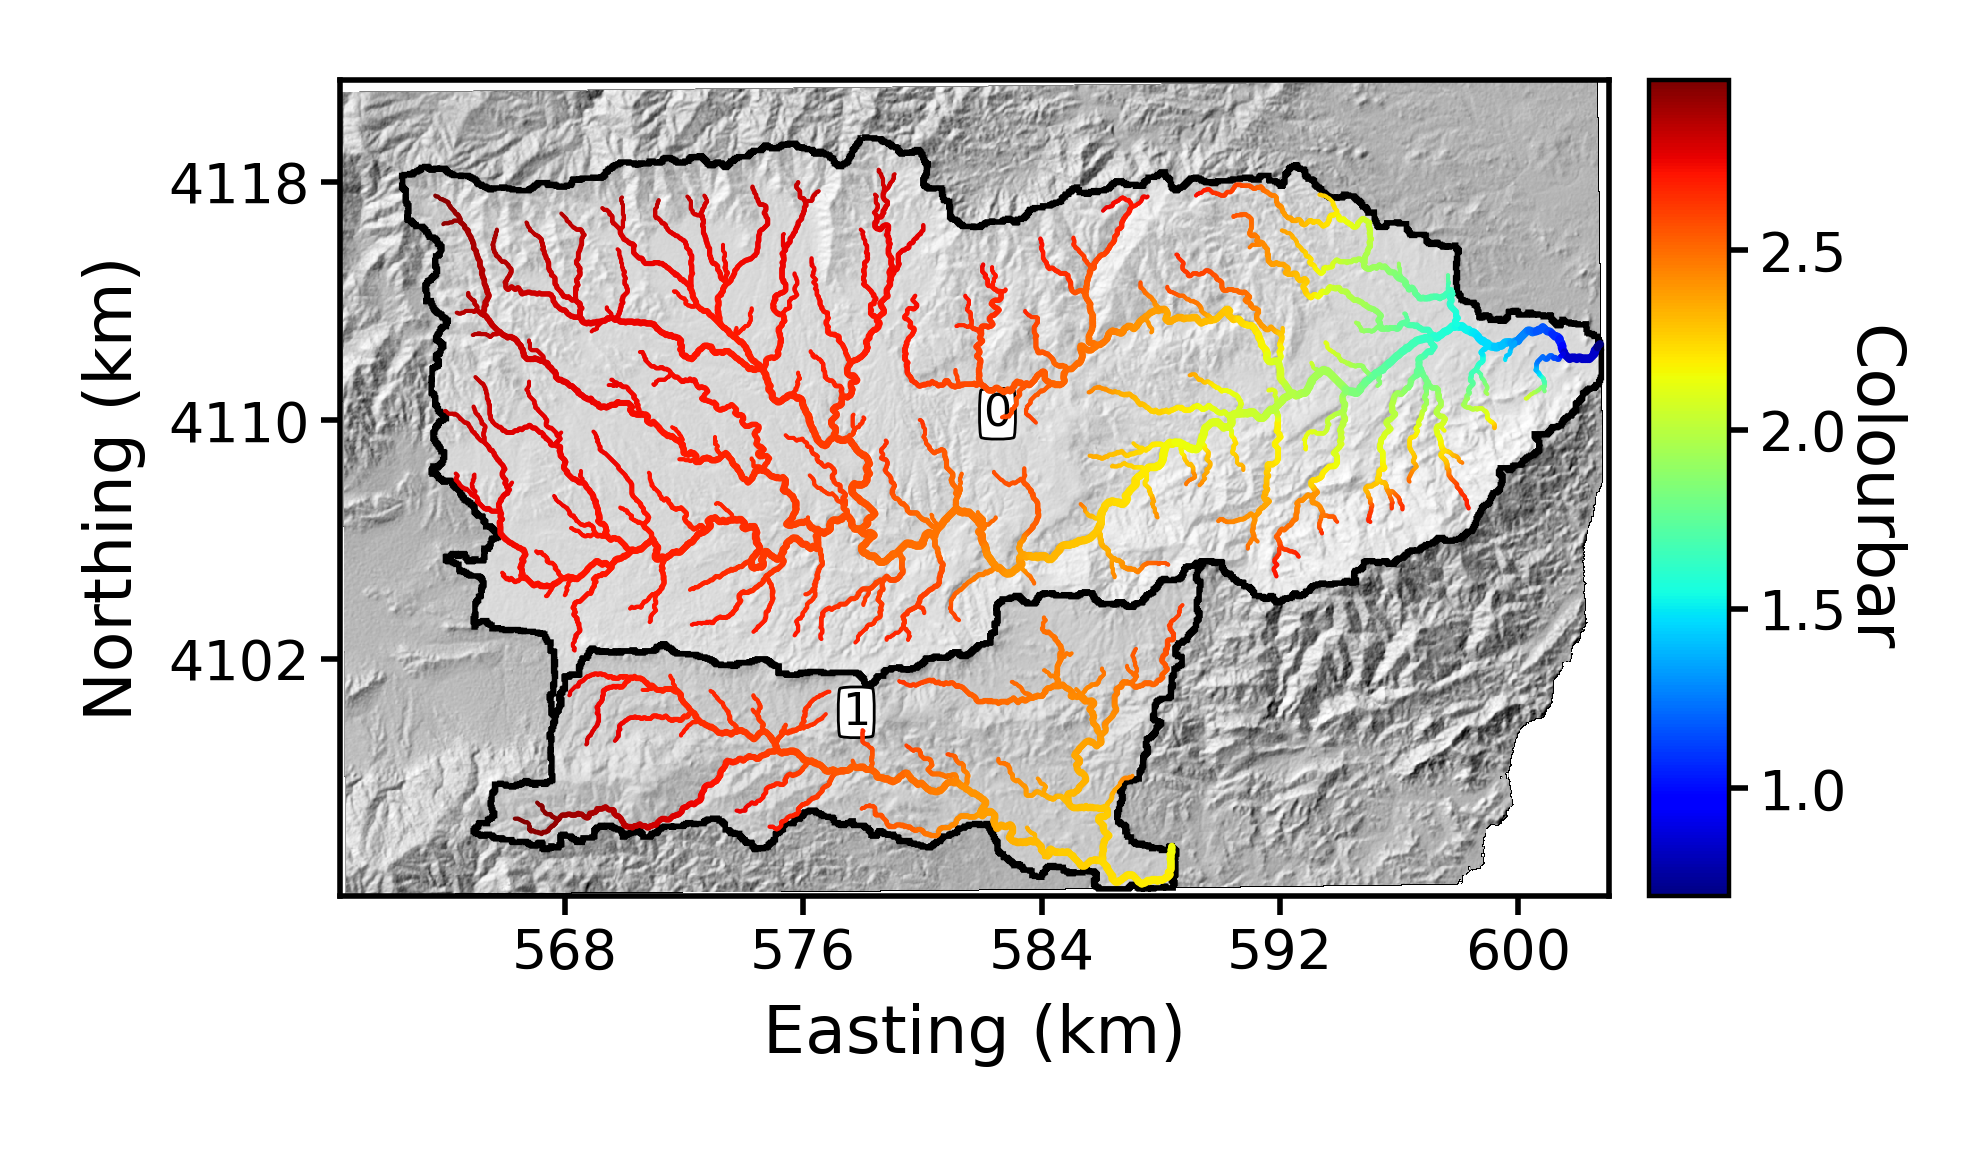

In [16]:
from IPython.display import Image
Image('rio_aguas_SRTMGL1_UTM_chi_channels_and_basins.png')

In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf = gdf.set_crs(epsg=4326)
print(gdf.head())

gdf2 = gdf.to_crs("EPSG:32610")

gdf_b1 = gdf2[(gdf2['basin_key'] == 0)]
print(gdf_b1.head())

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(gdf_b1.chi,gdf_b1.elevation,c=gdf_b1.flow_distance,s=1)
plt.xlabel(r"$\chi$ (m)")
plt.ylabel("elevation (m)")
fig.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(gdf_b1.flow_distance,gdf_b1.elevation,c=gdf_b1.flow_distance,s=1)
plt.xlabel(r"$\chi$ (m)")
plt.ylabel("elevation (m)")
fig.show()